# Solution of Linear and Nonlinear Equations
### Week 5
[1] Mark Newman, Computational Physics\
[2] 추상목, 신경망 학습이론과 PyTorch\
[3] Snehashish Chakraverty, Sumit Kumar Jeswal, Applied Artificial Neural Network Methods for Engineering Scientists Solving Algebraic Equations

# 1. Linear Equation Solving
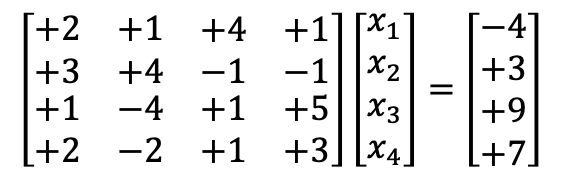

## 1-1. Gaussian Elimination

In [ ]:
# Gaussian Elimination and Backsubstitution

from numpy import array, empty
import time

A0 = array([[ 2,  1,  4,  1 ],
            [ 3,  4, -1, -1 ],
            [ 1, -4,  1,  5 ],
            [ 2, -2,  1,  3 ]],float)
v0 = array([ -4, 3, 9, 7 ],float)

In [ ]:
# Gaussian elimination

A = A0
v = v0
N = len(v) 

for m in range(N): # for-loop for every row

    # Divide by the diagonal element
    div = A[m,m]  # diagonal element
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]  # A[row, column]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

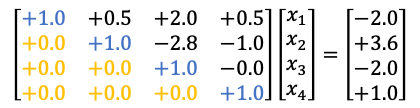

In [ ]:
# Backsubstitution

x = empty(N,float)

for m in range(N-1,-1,-1):   # m=3 -> m=2 -> m=1 -> m=0 (Python convention)
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

## 1-2. LU Decomposition

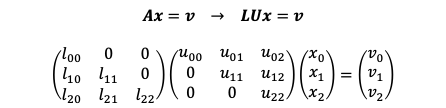

In [ ]:
# Numpy library function (based on LU decomposition)

from numpy.linalg import solve
x=solve(A,v)

### ----> See details in the textbook or lecture! Also, try QR decomposition in homework.

## 1-3. Example: Motion of Spring
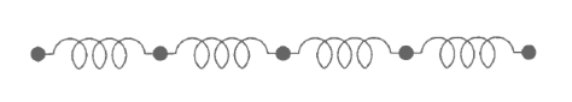 \
Identical mass $m$, and identical spring constant $k$. Let $\xi_i$ is the displacement of the $i$th mass relative to its rest position. \
Suppose we have a set of N identical masses in a row, joined by identical linear springs.\
Equations of motion ($2 {\leq} i {\leq} N-1$): \
$m{{d^2\xi_i}\over{dt^2}}=k(\xi_2-\xi_1) + F_1$ \
$m{{d^2\xi_1}\over{dt^2}}=k(\xi_{i+1}-\xi_i) + k(\xi_{i-1}-\xi_i) +F_i$ \
$m{{d^2\xi_N}\over{dt^2}}=k(\xi_{N-1}-\xi_N) +F_N$ \
Suppose we apply a harmonic force to the first mass with $F_1=C e^{i\omega t}$. Then, the net result of the applied force will be to make all masses osillate in some fashion with angular frequency $\omega$, so that the overall solution for the position of the masses will take the form $\xi_i(t)=x_i e^{i\omega t}$ for all $i$. Here, $x_i$ controls the amplitude of vibration of mass $i$. \
$-m\omega^2x_1=k(x_2-x_1)+C$ \
$-m\omega^2x_i=k(x_{i+1}-x_1)+k(x_{i-1}-x_i)$ \
$-m\omega^2x_N=k(x_{N-1}-x_N)$ \
These equations can be rearranged to read \
$(\alpha-k)x_1-kx_2=C$\
$\alpha x_i - kx_{i-1}-kx_{i+1}=0$\
$(\alpha-k)x_N-kx_{N-1}=0$\
where $\alpha=2k-m\omega^2$, and then we have this equation in a matrix form. See equation (6.56) in textbook.\
\
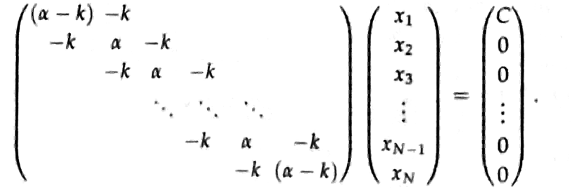

In [ ]:
from numpy import zeros,empty
import matplotlib.pyplot as plt

# Constants
N = 26   # total 26 masses
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = zeros([N,N],float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

In [ ]:
# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]

In [ ]:
# Make a plot using both dots and lines
plt.plot(x)
plt.plot(x,"ko")
plt.xlabel("Index of $i$th mass")
plt.ylabel("Amplitude (arb. unit)")
plt.title("Amplitude of the osillation")
plt.show()

# 2. Nonlinear Equation Solving
## 2-1. Relaxation Method

In [ ]:
# The Relaxation Method (Case 1)

from math import exp
x = 1.0
N = 6
for k in range (N):
    x = 2 - exp(-x)
    print(x)

In [ ]:
# The Relaxation Method (Case 2)
from math import exp, sqrt, log
x = 1/2
y = 1/2
N = 6

for k in range (N):
    x = exp(1-x**2)
    y = sqrt(1-log(y))
    print("Eq1: {0:.5f}".format(x),"   Eq2: {0:.5f}".format(y))

# plt.plot(X)
# plt.plot(Y)
# plt.ylabel("Solution")
# plt.xlabel("Iterations")

# plt.show()

In [ ]:
# The Relaxation Method (Case 3)
from math import sin, asin
x = 1/2
y = 1/2
N = 6
for k in range (N):
    x = x**2 + sin(2*x)
    y = (1/2)*asin(y-y**2)
    print("Eq1: {0:.5f}".format(x),"   Eq2: {0:.5f}".format(y))

## 2-2. Relaxation Method - Example: Ferromagnetism
In the mean-field theory of ferromagnetism, the strength $M$ of magnetization of a ferromagnetic material like iron depeds on temperature $T$ according to the formula \
$M=\mu \tanh{{JM}\over{k_B T}}$ \
where, $\mu$ is a magnetic moment, $J$ is a coupling constant, and $k_B$ is Boltzmann's constant. For simplicity, let us make the substitution $m={{M}\over{\mu}}$ and $C=\mu J/k_B$ so that \
$m=\tanh{{Cm}\over{T}}$

1. Always has a solution at $m=0$, which means not magnetized at all.
2. No known method of solving for $m{\neq}0$ solution exactly. 

* Note: Since we know the full functional form of the equation, the error is given by ${\epsilon}' ={{m-m'}\over{1-T{\cosh}^2(m/T)}}$, where '(apostrophe) denotes the next estimation.

In [ ]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show,ylim,xlabel,ylabel

# Constants
Tmax = 2.0
points = 1000
accuracy = 1e-6
C = 1.0 # For simplicity

# Set up lists for plotting
y = []
temp = linspace(0.01,Tmax,points)

# Temperature loop
for T in temp:
    m1 = 1.0      # initial value
    error = 1.0   # initial value

    # Loop until error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T), m1
        error = abs((m1-m2)/(1-T*cosh(m1/T)**2))
    y.append(m1)

In [ ]:
# Make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperature (arb. unit)")
ylabel("Magnetization (arb. unit)")
show()

## 2-3. Newton's Method - Example: Inverse Hyperbolic Tangent

$x=\tanh^{-1}{u}$    (→ where $x$ is the number such that $u=\tanh{x}$)

$(\tanh{x})-u=0$    (→ $x$ is the root of the eqation) \
\
For the Newton's method, $x'=x-\Delta x = x - {f(x)\over f'(x)}$. \
For this inverse hyperbolic tangent function, $x'=x-((\tanh{x})-u)\cosh^2{x}$

We can calculate arctanh function using this numerical approach !

In [ ]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show, xlabel, ylabel

accuracy = 1e-12

def arctanh(u):
    x = 0.0  # Initial Guess
    delta = 1.0
    while abs(delta)>accuracy:
        delta = (tanh(x)-u)*cosh(x)**2
        x -= delta
    return x

upoints = linspace(-0.99,0.99,100)
xpoints = []
for u in upoints:
    xpoints.append(arctanh(u))

plot(upoints,xpoints)
xlabel("u")
ylabel("x")
show()


# 3. Finding Minimum (Example: The Buckingham Potential)
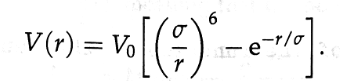 \
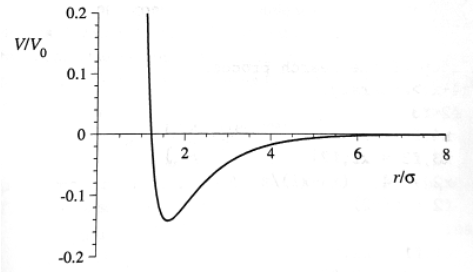

In [ ]:
from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1>accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")


# 4. Linear Equation Solving using Neural Network

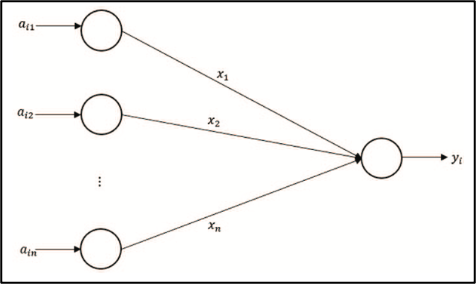

In [ ]:
import torch
import torch.nn as nn

# Given matrix A and vector v 
A = torch.tensor([[2.0, 1.0, 4.0, 1.0],
                  [3.0, 4.0, -1.0, -1.0],
                  [1.0, -4.0, 1.0, 5.0],
                  [2.0, -2.0, 1.0, 3.0]], requires_grad=False)

v = torch.tensor([-4.0, 3.0, 9.0, 7.0], requires_grad=False)

# Fix initial parameters
torch.manual_seed(1)

# Model network: Define a single layer and single node neural network (i.e. perceptron)
net = nn.Linear(4, 1, bias=False) 

# Optimizer
# optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

# Parameters
params=list(net.parameters())

# Number of iterations
num_iterations = 500000  # Default: 500,000 iterations for SGD

# Precision tolerance, can be adjusted 
tolerance = 1e-6;

# Parameters
print(params)

In [ ]:
import matplotlib.pyplot as plt
import time

# To store loss values and weights for plotting
losses = []
w1,w2,w3,w4= [],[],[],[]

# Training loop
start_time=time.time();

for k in range(num_iterations):
    
    # Forward process: 
    output = net(A)  # Output is model(A), i.e., y = A * X
    
    # Compute loss:
    loss = (1/len(v))*torch.sum((output.squeeze() - v)**2)
    
    # Backward process: 
    optimizer.zero_grad() # Initialize saved gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update the weights
    
    # Store loss and weights for plotting
    losses.append(loss.item())
    w1.append(params[0].data[0][0].item())
    w2.append(params[0].data[0][1].item())
    w3.append(params[0].data[0][2].item())
    w4.append(params[0].data[0][3].item())
    
    # Check if the loss is within the tolerance
    if loss.item() < tolerance:  # Precision tolerance, can be adjusted 
        print(f"Converged at iteration {k}")
        break

end_time=time.time()
execution_time=end_time-start_time; # ~43 sec for SGD Optimizer with tolerance 1e-5 and lr 0.0001 @ Macbook Air M1 - CPU.
                                    # <3 sec for Adam Optimizer with tolerance 1e-5 and lr 0.0001 @ Macbook Air M1 - CPU.

# Final result
print("Solution [x1,x2,x3,x4]=", list(params[0]))
print("Time Elapsed:", execution_time, "sec")

In [ ]:
# Plotting the loss over iterations
plt.plot(losses)
plt.title('Loss convergence in the single-layer neural network')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Plotting the weights over iterations
plt.plot(w1)
plt.plot(w2)
plt.plot(w3)
plt.plot(w4)
plt.title('Weights in single-layer neural network')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.legend(["w1","w2","w3","w4"])
plt.grid(True)
plt.show()

print("Solutions:", params)